# K-Means

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index = df.iloc[:,0]

In [4]:
df = df.iloc[:,1:5]

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


## K-MEANS Model ve Görselleştirme

In [10]:
kmeans = KMeans(n_clusters = 4)

In [11]:
k_fit = kmeans.fit(df)

In [12]:
k_fit.n_clusters

4

In [13]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [14]:
k_fit.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [15]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [16]:
kumeler = k_fit.labels_

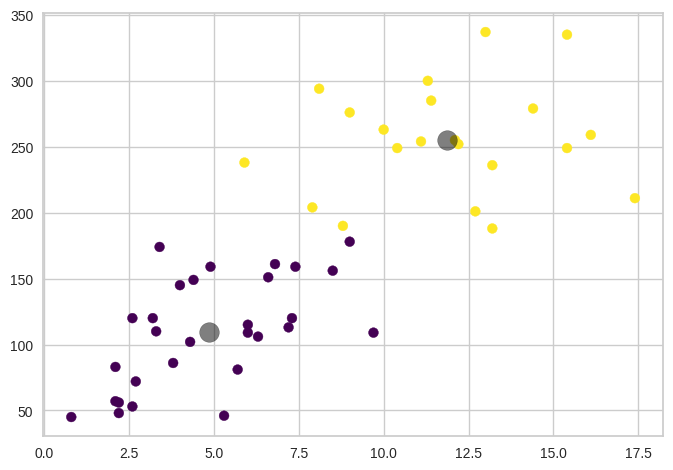

In [17]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [18]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [19]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

<Figure size 1600x900 with 0 Axes>

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2],
           marker='*',
           c='#050505',
           s=1000);

<Figure size 1600x900 with 0 Axes>

In [21]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [22]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,1
4,California,2
5,Colorado,1
6,Connecticut,0
7,Delaware,2
8,Florida,2
9,Georgia,1


In [23]:
df["kume_no"] = kumeler

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [25]:
df["kume_no"] = df["kume_no"] + 1

In [26]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,3


# Optimum Kume Sayısının Belirlenmesi

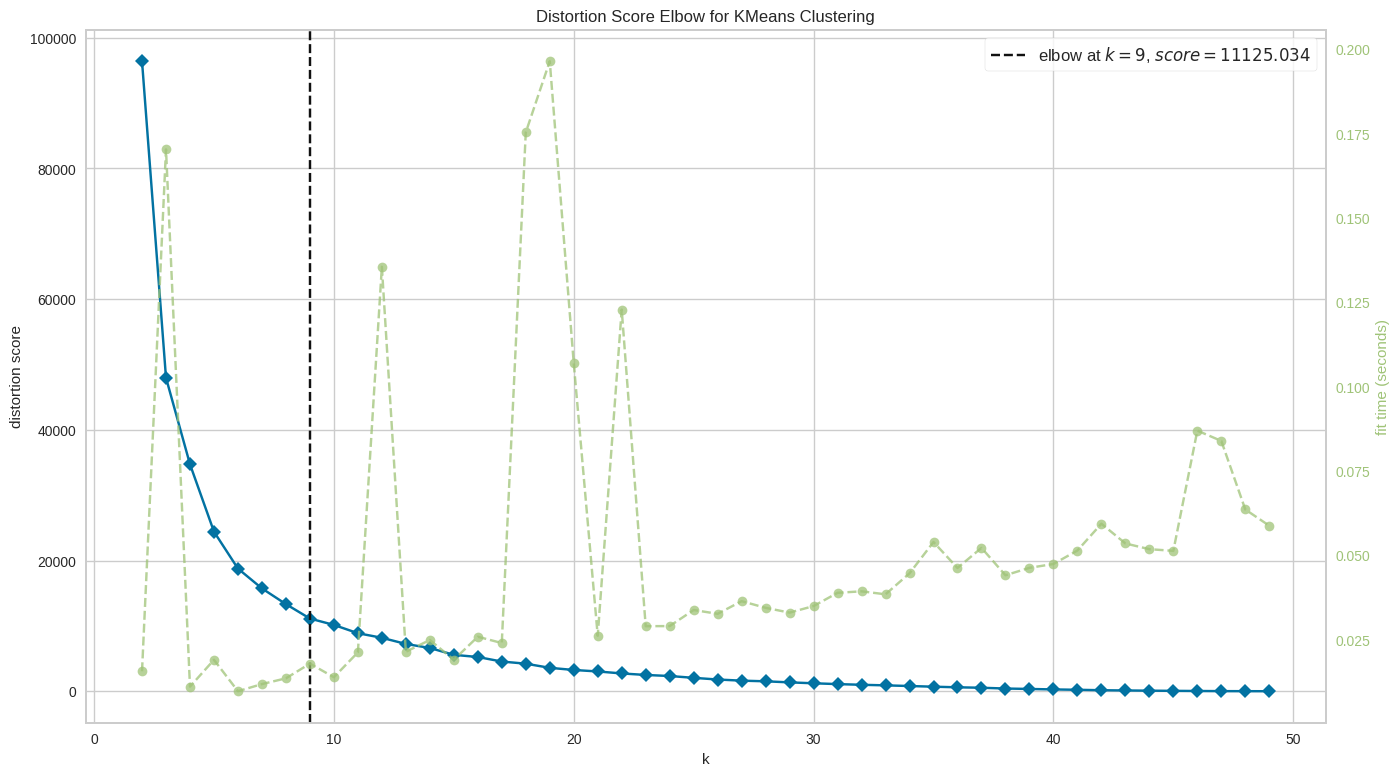

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [30]:
kmeans = KMeans(n_clusters = 9)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [31]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,8
2,Arizona,5
3,Arkansas,6
4,California,5
5,Colorado,6
6,Connecticut,1
7,Delaware,0
8,Florida,2
9,Georgia,6
